## Machine Learning I 
## Final Project

## Date: 27 November 2018

## Group 6
## Group Member: Naixin Zhu


## Step 1: Getting to Know the Dataset

In [1]:
#####################################################################
############ Getting to know the datasets ###########################
####### Get the list of all actors/actresses ########################
#####################################################################

# Dataset is obtained from Kaggle
# https://www.kaggle.com/tmdb/tmdb-movie-metadata

import pandas as pd
df1 = pd.read_csv("tmdb_5000_credits.csv")

#####################################################################
# 1. Know the shape of your dataset
print("Shape of tmdb_5000_credits.csv")
print(df1.shape)

#####################################################################
# 2. Know the column titles of your dataset
print(list(df1.columns.values))

#####################################################################
# 3. Know the cast (dictionary)

print(len(df1.cast))
# df1.cast contain 4803 lists, each contain many dictionaries. Within each dictionary, 
# you can find the cast names and character names. 

# Print the cast of movie Avatar, the first movie on the list
print(df1['cast'][0])

# Get the name of the first actor in Avatar
print(eval(df1['cast'][0])[0].get('name'))


# Get the number of actors/actresses in the first movie Avatar
print(len(eval(df1['cast'][0])))

# Get the list of all actors and actress in the entire 4803 movies
# ith movie, and jth actor in the ith movie

full_list_cast_all_movies = []

for i in range(len(df1.cast)):
    for j in range(len(eval(df1['cast'][i]))):
         full_list_cast_all_movies.append(eval(df1['cast'][i])[j].get('name'))
   

Shape of tmdb_5000_credits.csv
(4803, 4)
['movie_id', 'title', 'cast', 'crew']
4803
[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7

## Step 2: Create New Feature: 
## Number of Top Tier Actors/Actresses in a Movie

In [2]:
########################################################################################
############# Determine the List of Top Tier Actors/Actresses ##########################
########################################################################################


from collections import Counter
import numpy as np

# Find the most common element in the list of all stars in all 4803 movies
c=Counter(full_list_cast_all_movies)
print("The 30 most commonly appeared actors/actresses in the entire 4803 movies")
print(c.most_common(30))
print()
print("The total appearances of actors/actresses in in the entire 4803 movies (contain duplications):")
print(len(full_list_cast_all_movies))
print()

# Find the number of unique values in full_list_cast_all_movies
unique_cast= np.unique(full_list_cast_all_movies)
print("The number of unique actors/actresses in in the entire 4803 movies:") 
print(len(unique_cast))
print()



# Create a tier-1 actors/actresses list
# The list is from Forbesindices = [i for i, s in enumerate(mylist) if 'aa' in s]
print("The list of TOP 30 most famous movies stars from Forbes:")
top_tier = ["Mark Wahlberg", "Dwayne Johnson", "Vin Diesel", \
            "Adam Sandler", "Jackie Chan", "Robert Downey Jr.", "Tom Cruise", "Shah Rukh Khan",\
            "Salman Khan", "Akshay Kumar", "Chris Hemsworth", "Tom Hanks", "Samuel L. Jackson",\
            "Ryan Gosling", "Emma Stone", "Jennifer Aniston", "Jennifer Lawrence", "Ryan Reynolds",\
            "Matt Damon", "Jeremy Renner", "Chris Evans", "Melissa McCarthy", "Chris Pratt", "Mila Kunis",\
            "Emma Watson", "Charlize Theron", "Mark Ruffalo", "Cate Blanchett", "Julia Roberts", "Amy Adams"]
print(len(top_tier))
print()
print()

# To check the spelling of those top_tier actors are the same in our unique_elements list
def intersection(unique_cast, top_tier): 
    lst3 = [value for value in unique_cast if value in top_tier] 
    return lst3 

print("This is to check the intersection of top 30 from Forbes against the entire movie stars in our dataset")
print("I found 29 of the TOP30 Forbes list are spelled exactly the same in our dataset, while the 1 named ‘Salman Khan’ does not exist in our dataset")
lst3 = intersection(unique_cast, top_tier)
print(len(lst3))
print(lst3)

# Find the element in top_tier that is not in lst3: Salman Khan
lst4 = np.setdiff1d(top_tier, lst3, assume_unique=True)
print(lst4)

# Search whether our unique_cast contains Salman Khan, just spelled differently
# Cite https://stackoverflow.com/questions/14849293/python-find-index-position-in-list-based-of-partial-string
print()
print("In order to eliminate the possibility that Salman Khan is spelled differently in our dataset")
print("I searched 'Salman' in the unique movie cast list and found 2 results with indices below")
indices = [i for i, s in enumerate(unique_cast) if 'Salman' in s]
print(indices)

print("Extracting names according to those 2 indices return the following 2 movie stars, neither of whom is Salman Khan")
# This is Salman Hassan
print(unique_cast[45310])
# This is Salman Yusuff Khan
print(unique_cast[45311])
print()
print()

# Neither Salman Hassan nor Salman Yusuff Khan is our missing actor Salman Khan
# So I decide to reduce the 30 top_tier actors to 29 top_tier actors
print("So I delete Salman Khan from Forbe TOP30 list and the top tier in our project is as follows:")
top_tier = ["Mark Wahlberg", "Dwayne Johnson", "Vin Diesel", \
            "Adam Sandler", "Jackie Chan", "Robert Downey Jr.", "Tom Cruise", "Shah Rukh Khan",\
            "Akshay Kumar", "Chris Hemsworth", "Tom Hanks", "Samuel L. Jackson",\
            "Ryan Gosling", "Emma Stone", "Jennifer Aniston", "Jennifer Lawrence", "Ryan Reynolds",\
            "Matt Damon", "Jeremy Renner", "Chris Evans", "Melissa McCarthy", "Chris Pratt", "Mila Kunis",\
            "Emma Watson", "Charlize Theron", "Mark Ruffalo", "Cate Blanchett", "Julia Roberts", "Amy Adams"]

print(len(top_tier))

The 30 most commonly appeared actors/actresses in the entire 4803 movies
[('Samuel L. Jackson', 67), ('Robert De Niro', 57), ('Bruce Willis', 51), ('Matt Damon', 48), ('Morgan Freeman', 46), ('Steve Buscemi', 43), ('Liam Neeson', 41), ('Johnny Depp', 40), ('Owen Wilson', 40), ('John Goodman', 39), ('Nicolas Cage', 39), ('Alec Baldwin', 39), ('Willem Dafoe', 38), ('Jim Broadbent', 38), ('Stanley Tucci', 38), ('Brad Pitt', 38), ('Paul Giamatti', 37), ('Will Ferrell', 37), ('Richard Jenkins', 36), ('Susan Sarandon', 36), ('J.K. Simmons', 35), ('Bill Murray', 35), ('Christopher Walken', 35), ('Keith David', 35), ('Michael Shannon', 34), ('Bill Hader', 34), ('Jack Black', 34), ('Paul Rudd', 34), ('Ben Kingsley', 34), ('George Clooney', 34)]

The total appearances of actors/actresses in in the entire 4803 movies (contain duplications):
106257

The number of unique actors/actresses in in the entire 4803 movies:
54201

The list of TOP 30 most famous movies stars from Forbes:
30


This is to ch

In [3]:
########################################################################################
######## Create new feature: No. of Top Tier Actors/Actresses in Each Movie ############
########################################################################################

########################################################################################
# First create a list of lists for casts in each movie
# List cast_by_movie contains 4803 sub-lists, each sub-list is the entire cast of that movie
a = 4803
cast_by_movie = [[] for _ in range(a)]

for i in range(len(df1.cast)):
    for j in range(len(eval(df1['cast'][i]))):
         cast_by_movie[i].append(eval(df1['cast'][i])[j].get('name'))


In [4]:
########################################################################################
######## Create new feature: No. of Top Tier Actors/Actresses in Each Movie ############
########################################################################################
# Now we've created a list of lists, in which each list is the cast of a movie
# Print the cast of the first movie Avartar, with index number 0, just to check

print("This is the list of all cast in the first movie: Avatar")
print(cast_by_movie[0])
print()
print()

# Find the intersection between each movie's cast and top_tier
# Name the new list of lists as top_tier_in_each_movie
# top_tier_in_each_movie contains 4803 sub lists, and each sub list contains the name of the actor/actress that is also in the top_tier
a = 4803
top_tier_in_each_movie = [[] for _ in range(a)]


for i in range(len(cast_by_movie)):
    top_tier_in_each_movie[i].append(intersection(cast_by_movie[i], top_tier))

print("This is the name of top tier cast in each movie(sub-list), when there is no top tier cast in movie, it is empty")
print(top_tier_in_each_movie)
print()
print()

# Count the number of top_tier actors/actresses in each movie
# And put the number into a new list no_top_tier_in_each_movie
no_top_tier_in_each_movie = []

for i in range(4803):
        no_top_tier_in_each_movie.append(len(top_tier_in_each_movie[i][0]))

print("This is the number of top tier cast in each movie")
print(no_top_tier_in_each_movie)
print()
print()

print("This is total number of movies")
print(len(no_top_tier_in_each_movie))
print()
print()


# Add no_top_tier_in_each_movie as a new column to our dataset df1
df1['No_of_Top_Tier'] = pd.Series(no_top_tier_in_each_movie).values

print("This is the shape of dataframe after adding in the new feature: No_of_Top_Tier")
print(df1.shape)
df1.head()



This is the list of all cast in the first movie: Avatar
['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang', 'Michelle Rodriguez', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy', 'Peter Dillon', 'Kevin Dorman', 'Kelson Henderson', 'David Van Horn', 'Jacob Tomuri', 'Michael Blain-Rozgay', 'Jon Curry', 'Luke Hawker', 'Woody Schultz', 'Peter Mensah', 'Sonia Yee', 'Jahnel Curfman', 'Ilram Choi', 'Kyla Warren', 'Lisa Roumain', 'Debra Wilson', 'Chris Mala', 'Taylor Kibby', 'Jodie Landau', 'Julie Lamm', 'Cullen B. Madden', 'Joseph Brady Madden', 'Frankie Torres', 'Austin Wilson', 'Sara Wilson', 'Tamica Washington-Miller', 'Lucy Briant', 'Nathan Meister', 'Gerry Blair', 'Matthew Chamberlain', 'Paul Yates', 'Wray Wilson', 'James Gaylyn', 'Melvin Leno Clark III', 'Carvon Futrell', 'Brandon Jelkes', 'Mi

,movie_id,title,cast,crew,No_of_Top_Tier
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",0
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",0
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",0
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",0
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",0


In [5]:
## Visualize the number of top-tier in each movie
## Due to the large number of movies, we first need to group movies according to number of top-tier stars they have
group_top_tier = {}
for i in range(6):
    group_top_tier[i] = 0


for i in range(6):
    for j in range(len(no_top_tier_in_each_movie)):
        if no_top_tier_in_each_movie[j] == i:
            group_top_tier[i] += 1


print()
print("This is the histogram of number movies which share the same number of top-tier stars in them")
import matplotlib.pyplot as plt
width = 0.8
plot1 = plt.bar(group_top_tier.keys(), group_top_tier.values(), width, color='g')




This is the histogram of number movies which share the same number of top-tier stars in them


## Step 3: Create New Feature:
## Number of Second-tier Actors/Actresses in a Movie

In [6]:
#############################################################################
#############################################################################
#### Create the feature of second-tier actors and actresses #################


#############################################################################
## Step 3.1: Determine the list of second-tier actors/actresses


#############################################################################
## Step 3.1.1: Get the number of collaboration (appear in the same movie) with top_tier for 
## every single actor/actress in the entire database. 

# Delete the top_tier actors/actresses from unique_cast since
# this is a dictionary for finding second_tier actors/actresses,
# and top_tier should not be in the dictionary. 

potential_sed_tier = np.setdiff1d(unique_cast, top_tier, assume_unique=True)
print(potential_sed_tier)
print(len(potential_sed_tier))


# Initialize a dictionary with the entire list of potential second tier cast and 
# uniformly set their values to 0.
collab_top_tier = {}
for i in range(len(potential_sed_tier)):
    collab_top_tier[potential_sed_tier[i]] = 0

    
for i in range(len(potential_sed_tier)):
    for j in range(len(top_tier_in_each_movie)):
        if top_tier_in_each_movie[j] != [[]] and potential_sed_tier[i] in cast_by_movie[j]:
            collab_top_tier[potential_sed_tier[i]] += 1

# Check if the dictionary has been created correctly
"""
print(cast_by_movie[7])
print(collab_top_tier)
collab_top_tier.get('Verity Hewlett')

"""

['  Jorge de los Reyes ' ' Larry Mullen Jr.' '"Weird Al" Yankovic' ...
 'Юлия Снигирь' 'پیمان معادی' '徐帆']
54172


"\nprint(cast_by_movie[7])\nprint(collab_top_tier)\ncollab_top_tier.get('Verity Hewlett')\n\n"

This is the number of second tier actors/actresses grouped by the number of collaboration with top tier
Keys are the number of collaboration, value are the total number of second tier cast who have shared the same number of collaboration with top tier
{0: 40494, 1: 11076, 2: 1538, 3: 493, 4: 227, 5: 137, 6: 81, 7: 45, 8: 35, 9: 17, 10: 14, 11: 6, 12: 1, 13: 4, 14: 1, 15: 0, 16: 2, 17: 1}

This is the histogram of number of potential second-tier stars grouped into number of collaboration with top-tier
This is a dicitonary showing the top second-tier cast whose collaboration number equal to and more than 5
I have deliberately picked the threshhold 5 because I want the total number of top second tier cast be around 200

{'Adewale Akinnuoye-Agbaje': 5, 'Adrian Rawlins': 5, 'Angelina Jolie': 5, 'Anna Faris': 5, 'Anthony Hopkins': 5, 'Benedict Cumberbatch': 5, 'Bernard Hill': 5, 'Bernie Mac': 5, 'Billy Bob Thornton': 5, 'Billy Crudup': 5, 'Bob Gunton': 5, 'Bonnie Hunt': 5, 'Brandon Molale': 

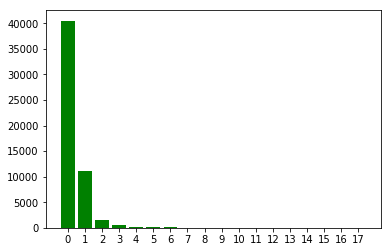

In [7]:
##############################################################
## Sort the collab_top_tier in descending order
collab_top_tier_descending = sorted(collab_top_tier.items(), key=lambda x: x[1], reverse=True)

# In the proposal, I assume that second tier actors/actresses collaborate more with top_tier
# than those who are not second tier. So I've found the dictionary of times of appearing in the same movie with top tiers
# for the entire population of non-top-tier actors/actresses. 
# To observe the dictionary in descending order of the number of collaborations with top_tier
# and decide whether there is a natural break
#print(collab_top_tier_descending)

# Calculate the total number of actors/actresses by categories of collaboration times
# For example, the total number of actors/actresses who collaborated with top_tier for n times are...
group_sed_tier = {}
for i in range(18):
    group_sed_tier[i] = 0


for i in range(18):
    for j in range(len(collab_top_tier_descending)):
        if collab_top_tier_descending[j][1] == i:
            group_sed_tier[i] += 1

print("This is the number of second tier actors/actresses grouped by the number of collaboration with top tier")
print("Keys are the number of collaboration, value are the total number of second tier cast who have shared the same number of collaboration with top tier")
print(group_sed_tier)
print()
print("This is the histogram of number of potential second-tier stars grouped into number of collaboration with top-tier")
import matplotlib.pyplot as plt
width = 0.8
plot2 = plt.bar(group_sed_tier.keys(), group_sed_tier.values(), width, color='g')
plt.xticks(range(len(group_sed_tier)), list(group_sed_tier.keys()))


# By judging from the numbers of cast in each category (defined as number of appearance in the same movie with top-tier),
# I decide to define second_tier cast by including all the actors/actresses who have appeared >= 5 times in a same movie with top_tier
# The reason being that I would like to include around 200 second-tier cast, which is comparable to our top-tier 29 people. 

sed_tier_dic = {}
for i in range(5,18):
    for j in range(len(collab_top_tier_descending)):
        if collab_top_tier_descending[j][1] == i:
            sed_tier_dic[collab_top_tier_descending[j][0]] = i

print("This is a dicitonary showing the top second-tier cast whose collaboration number equal to and more than 5")
print("I have deliberately picked the threshhold 5 because I want the total number of top second tier cast be around 200")
print()
print(sed_tier_dic)
print()
print()



# Turn sed_tier_dic into a list consisting only the names of those second tier actors/actresses

print("This is the list of top second cast by their names")
print()
sed_tier = list(sed_tier_dic.keys())
print(sed_tier)

In [8]:
######################################################################################################
## Step 3.2: Create a new feature representing the number of second-tier actors/actresses in each movie
#######################################################################################################

a = 4803
sed_tier_in_each_movie = [[] for _ in range(a)]


for i in range(len(cast_by_movie)):
    sed_tier_in_each_movie[i].append(intersection(cast_by_movie[i], sed_tier))

print("This is the list of second tier cast in each movie (sub-list)")
print()
print(sed_tier_in_each_movie)
print()
print()

# Count the number of sed_tier actors/actresses in each movie
# And put the number into a new list no_top_tier_in_each_movie
no_sed_tier_in_each_movie = []

for i in range(4803):
    no_sed_tier_in_each_movie.append(len(sed_tier_in_each_movie[i][0]))
    

print("This list is the number of second tier cast in each movie") 
print(no_sed_tier_in_each_movie)
print("This is the total number of movies")
print(len(no_sed_tier_in_each_movie))
print()
print()


# Add no_sed_tier_in_each_movie as a new column to our dataset df1
df1['No_of_Second_Tier'] = pd.Series(no_sed_tier_in_each_movie).values

print("This is the shape of the dataframe after adding in the new feature: No_of_Second_Tier")
print(df1.shape)
df1.head()



This is the list of second tier cast in each movie (sub-list)

[[['Zoe Saldana', 'Michelle Rodriguez', 'Giovanni Ribisi']], [['Orlando Bloom', 'Stellan Skarsgård', 'Tom Hollander']], [['Christoph Waltz']], [['Christian Bale', 'Michael Caine', 'Gary Oldman', 'Morgan Freeman', 'Liam Neeson', 'Thomas Lennon', 'Mark Falvo']], [['Mark Strong', 'Ciarán Hinds', 'Dominic West', 'Bryan Cranston']], [['Kirsten Dunst', 'James Franco', 'J.K. Simmons', 'Elizabeth Banks', 'Stan Lee', 'Bruce Campbell']], [[]], [['Scarlett Johansson', 'Don Cheadle', 'Paul Bettany', 'Cobie Smulders', 'Anthony Mackie', 'Idris Elba', 'Stellan Skarsgård', 'Thomas Kretschmann', 'Andy Serkis', 'Stan Lee', 'Henry Goodman', 'Josh Brolin']], [['Daniel Radcliffe', 'Rupert Grint', 'Tom Felton', 'Michael Gambon', 'Jim Broadbent', 'Robbie Coltrane', 'Maggie Smith', 'Alan Rickman', 'Timothy Spall', 'Julie Walters', 'Matthew Lewis', 'Bonnie Wright', 'Oliver Phelps', 'James Phelps', 'Mark Williams', 'Warwick Davis', 'Geraldine Somerv

,movie_id,title,cast,crew,No_of_Top_Tier,No_of_Second_Tier
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",0,3
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",0,3
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",0,1
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",0,7
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",0,4


## Step 4: Create the Target -- Box Office Revenue

In [9]:
#####################################################################
#####################################################################
## Step 4.1: Getting to know the dataset containing the target variable: Revenue
# Dataset is obtained from Kaggle
# https://www.kaggle.com/tmdb/tmdb-movie-metadata

df2 = pd.read_csv("tmdb_5000_movies.csv")

print("This is the shape of a second dataframe I am going to merge with the previous one")
print(df2.shape)
df2.head()

This is the shape of a second dataframe I am going to merge with the previous one
(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [10]:
#####################################################################################
#####################################################################################
## Step 4.2: Merge df2 and df1 using inner merge on movie ID

# Rename the ID column in df2 to movie_id so it is the same with df1
df2.rename(columns={'id':'movie_id'}, inplace=True)

df3 = pd.merge(df1, df2, how='inner', on=['movie_id'])

print('Shape before dropping missing:' + str(df3.shape[0]))

df3 = df3.dropna(how='any')

print('Shape after dropping missing:' + str(df3.shape[0]))


Shape before dropping missing:4803
Shape after dropping missing:1493


## Step 5: Standadize Data

In [11]:
import pandas as pd
import numpy as np
################################################################
# Step 5.1 define features, X, and target Y
# I have selected the X variables 
df3 = pd.read_pickle('movie_df3.pkl')

X, y = df3[['No_of_Top_Tier', 'No_of_Second_Tier', 'budget']].values, df3['revenue'].values

# Step 5.2 Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 5.3 Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_test = scaler.transform(y_test.reshape(-1, 1)).reshape(-1)


C:\Users\naixi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Step 6: Random Forest Regressor and Feature Importance

In [12]:
##################################################################
## Use random forest to train and fit the model
## The code is borrowed from Prof. Huang HW4

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

# Some of the tuning code is borrowed from:
# https://www.kaggle.com/jondavidorr/hyperparameter-tuned-random-forest-regressor
# https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_random_search/
# The rest are borrowed from Prof. Huang in class exercise

# Define the parameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
min_samples_splits = [2, 5, 10, 15, 100]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_leafs = [1, 2, 5, 10]

# Create parameter grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_splits,
               'min_samples_leaf': min_samples_leafs}


# Declare random forest regressor
rf = RandomForestRegressor()

# Declare randomized search CV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)

# Fit the models on training datasets
best_model = rf_random.fit(X_train, y_train)

print("Best parameters are: ", best_model.best_estimator_.get_params())
# Predict the test dataset using the best model
y_pred = best_model.predict(X_test)

# Get the R-square score to compare with the R-squared from SVR later
print("The R squared score of the best random forest regressor model is " + str(r2_score(y_test, y_pred)))



C:\Users\naixi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.3min finished


Best parameters are:  {'bootstrap': True, 'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
The R squared score of the best random forest regressor model is 0.5940988150755315


C:\Users\naixi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


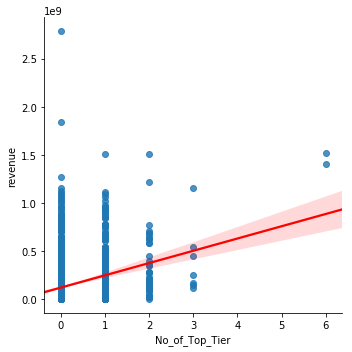

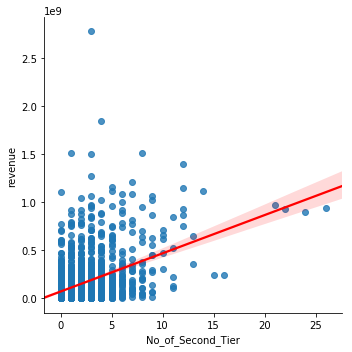

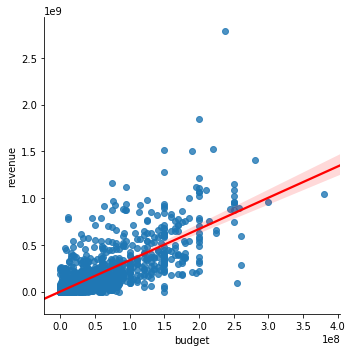

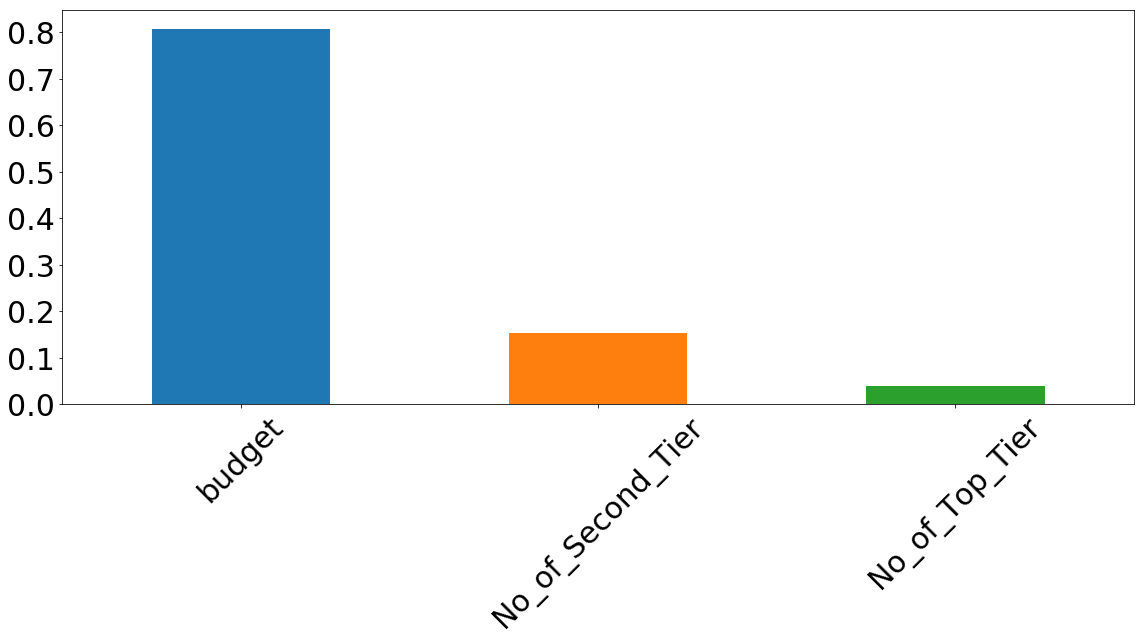

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# This chunck is borrowed from Prof. Huang HW1
features = ['No_of_Top_Tier', 'No_of_Second_Tier', 'budget']
target = 'revenue'

for feature in features:
    # Plot data and regression model comprised of the current feature and the target
    sns.lmplot(x=feature, y=target, data=df3, line_kws={'color': 'red'})
    
plt.tight_layout()
plt.show()

###########################################################
# Show the feature importance
# This code is borrowed from Prof. Huang HW4

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
# Get the importance from Random Forest classifier
rf.fit(X_train, y_train)
Importance = rf.feature_importances_
# Turn the importance into 1 dimensional numpy array
f_importances = pd.Series(Importance, df3[['No_of_Top_Tier', 'No_of_Second_Tier', 'budget']].columns)

# Sort the array in descending order of the importances
# Implement me
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

## Step 7: Use Support Vector Regressor with Hyperparameter Tuning

In [16]:

## Use SVC Pipieline
## Code borrowed from Prof. Huang Exercise 7
from sklearn.svm import SVR

# The list of value for hyperparameter C (penalty parameter)
Cs = [0.001, 0.01, 0.1, 1, 10]

# The list of choice for hyperparameter kernel
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# The list of epsilon
epsilons = [0, 0.01, 0.1, 0.5, 1, 2, 4, 6, 8, 10]

# The list of [score, setting], where score is the score of the classifier and setting a pair of (C, kernel, epsilon)
score_settings = []

# For each C
for C in Cs:
    # For each kernel
    for kernel in kernels:
        # For each espsilon
        for epsilon in epsilons:
            clf = SVR(C=C, kernel=kernel, epsilon = epsilon)
        
        
        # The scores across the 10-folds cross validation
            scores = []
        
            # Fit the pipeline
            clf.fit(X_train, y_train)

            # Get the score 
            score = clf.score(X_test, y_test)
        
        # Get the setting, which is a pair of (C, kernel)
            setting = [C, kernel, epsilon]
        
        # Append [mean_score, setting] to score_settings
            score_settings.append([score, setting])
        
# Sort score_settings in descending order of score
score_settings = sorted(score_settings, key=lambda x: x[0], reverse=True)

# Print score_settings
print('The list of [score, setting] is:')
for score_setting in score_settings:
    print(score_setting)
print()

# Print the best setting
print('The best setting is:')
print('C: ' + str(score_settings[0][1][0]))
print('kernel: ' + score_settings[0][1][1])

print("The best accuracy score is R-squared score on the test dataset is " + str(score_settings[0][0]))

The list of [score, setting] is:
[0.5805646123626067, [1, 'linear', 0.5]]
[0.5805260791789214, [10, 'linear', 0.5]]
[0.5777283330924672, [0.1, 'linear', 0.5]]
[0.5730546066594898, [10, 'rbf', 0.1]]
[0.5703055633991803, [10, 'rbf', 0]]
[0.5698219681279482, [10, 'rbf', 0.01]]
[0.5600276142088405, [10, 'linear', 0.1]]
[0.5599799913699286, [1, 'linear', 0.1]]
[0.5577587775511768, [0.1, 'linear', 0.1]]
[0.5534467511043049, [1, 'rbf', 0.1]]
[0.5473541744214032, [10, 'linear', 0.01]]
[0.5473067025151757, [1, 'linear', 0.01]]
[0.5470459176994122, [10, 'linear', 0]]
[0.5469012100719997, [1, 'linear', 0]]
[0.5468807930378129, [1, 'rbf', 0]]
[0.5467729456537991, [1, 'rbf', 0.01]]
[0.5455575253855127, [0.1, 'linear', 0.01]]
[0.5449538042408655, [0.1, 'linear', 0]]
[0.5389977386616922, [0.01, 'linear', 0.5]]
[0.5359145377630694, [0.01, 'linear', 0.1]]
[0.5297800329205433, [0.01, 'linear', 0.01]]
[0.5279536290149827, [0.01, 'linear', 0]]
[0.519295872311207, [10, 'rbf', 0.5]]
[0.5011275758821554, [1,

## Conclusion
- After tuning for Random Forest Regressor and Support Vector Regressor, the best accuracy score (here the R-squared value) is from random forest regressor: 0.5931440775701848, which is relative good explaning power with the limited features we have. 

- More discussions please see the final report. 